In [ ]:
import os
import pandas as pd
import psycopg2

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
conn = psycopg2.connect(
    host="dataviz.ce3i6u4ewfvq.us-east-2.rds.amazonaws.com",
    database="UofT_DB",
    user="postgres",
    password="postgres")
cursor = conn.cursor()

In [ ]:
df1 = pd.read_sql_query("select * from ownerstransactions",con=conn)
cursor.close() 

In [ ]:
df1

,id,gender,age,status,maritial,city,region,country,countwallet,sumwallet,counttappos,sumtappos,countonlineaut,sumonlineaut,countatm,sumatm
0,AA19975,female,67.0,active,Single,London,ON,Canada,0,0.0,24,1101.77,2,193.93,5,1733.21
1,AA20057,female,67.0,active,Married,Wyoming,ON,Canada,0,0.0,0,0.00,4,2772.24,0,0.00
2,AA20110,female,67.0,active,Married,Kingsville,ON,Canada,0,0.0,0,0.00,4,107.41,1,111.30
3,AA20147,female,67.0,active,Single,Ilderton,ON,Canada,0,0.0,32,2951.51,4,1082.77,0,0.00
4,AA20154,female,67.0,active,Married,Alvinston,ON,Canada,0,0.0,0,0.00,7,3366.89,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59043,ZW25694,male,52.0,active,Married,Kingsville,ON,Canada,0,0.0,18,1294.71,8,2638.38,0,0.00
59044,ZW28059,male,45.0,active,Married,Tillsonburg,ON,Canada,0,0.0,0,0.00,0,0.00,0,0.00
59045,ZW31386,male,36.0,active,Commonlaw,London,ON,Canada,0,0.0,13,380.71,7,1642.05,0,0.00
59046,ZW31484,male,36.0,active,Single,Thorndale,ON,Canada,0,0.0,0,0.00,0,0.00,0,0.00


In [ ]:
pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Imports
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Remove rows that have at least 1 null value.
df1 = df1.dropna()
df1.head()

,id,gender,age,status,maritial,city,region,country,countwallet,sumwallet,counttappos,sumtappos,countonlineaut,sumonlineaut,countatm,sumatm
0,AA19975,female,67.0,active,Single,London,ON,Canada,0,0.0,24,1101.77,2,193.93,5,1733.21
1,AA20057,female,67.0,active,Married,Wyoming,ON,Canada,0,0.0,0,0.00,4,2772.24,0,0.00
2,AA20110,female,67.0,active,Married,Kingsville,ON,Canada,0,0.0,0,0.00,4,107.41,1,111.30
3,AA20147,female,67.0,active,Single,Ilderton,ON,Canada,0,0.0,32,2951.51,4,1082.77,0,0.00
4,AA20154,female,67.0,active,Married,Alvinston,ON,Canada,0,0.0,0,0.00,7,3366.89,0,0.00


In [ ]:
df1= df1.loc[df1['status']=="active"]
df1.head()

,id,gender,age,status,maritial,city,region,country,countwallet,sumwallet,counttappos,sumtappos,countonlineaut,sumonlineaut,countatm,sumatm
0,AA19975,female,67.0,active,Single,London,ON,Canada,0,0.0,24,1101.77,2,193.93,5,1733.21
1,AA20057,female,67.0,active,Married,Wyoming,ON,Canada,0,0.0,0,0.00,4,2772.24,0,0.00
2,AA20110,female,67.0,active,Married,Kingsville,ON,Canada,0,0.0,0,0.00,4,107.41,1,111.30
3,AA20147,female,67.0,active,Single,Ilderton,ON,Canada,0,0.0,32,2951.51,4,1082.77,0,0.00
4,AA20154,female,67.0,active,Married,Alvinston,ON,Canada,0,0.0,0,0.00,7,3366.89,0,0.00


In [ ]:
df1.drop(columns=["status"], inplace=True)

In [ ]:
df1.drop(columns=["country"], inplace=True)

In [ ]:
df1.drop(columns=["region"], inplace=True)

In [ ]:
df1.dtypes

id                 object
gender             object
age               float64
maritial           object
city               object
countwallet         int64
sumwallet         float64
counttappos         int64
sumtappos         float64
countonlineaut      int64
sumonlineaut      float64
countatm            int64
sumatm            float64
dtype: object

In [ ]:
df_id = df1[['id']]
df_id.head()

,id
0,AA19975
1,AA20057
2,AA20110
3,AA20147
4,AA20154


In [ ]:
df1.drop(columns=["id"], inplace=True)
df1

,gender,age,maritial,city,countwallet,sumwallet,counttappos,sumtappos,countonlineaut,sumonlineaut,countatm,sumatm
0,female,67.0,Single,London,0,0.0,24,1101.77,2,193.93,5,1733.21
1,female,67.0,Married,Wyoming,0,0.0,0,0.00,4,2772.24,0,0.00
2,female,67.0,Married,Kingsville,0,0.0,0,0.00,4,107.41,1,111.30
3,female,67.0,Single,Ilderton,0,0.0,32,2951.51,4,1082.77,0,0.00
4,female,67.0,Married,Alvinston,0,0.0,0,0.00,7,3366.89,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
59043,male,52.0,Married,Kingsville,0,0.0,18,1294.71,8,2638.38,0,0.00
59044,male,45.0,Married,Tillsonburg,0,0.0,0,0.00,0,0.00,0,0.00
59045,male,36.0,Commonlaw,London,0,0.0,13,380.71,7,1642.05,0,0.00
59046,male,36.0,Single,Thorndale,0,0.0,0,0.00,0,0.00,0,0.00


In [ ]:
df1.drop(columns=["city"], inplace=True)

In [ ]:
# Use get_dummies()
X = pd.get_dummies(df1, columns=["gender", "maritial"])
X.head()

,age,countwallet,sumwallet,counttappos,sumtappos,countonlineaut,sumonlineaut,countatm,sumatm,gender_,gender_female,gender_male,maritial_,maritial_Commonlaw,maritial_Divorced,maritial_Married,maritial_Separated,maritial_Single,maritial_Widowed
0,67.0,0,0.0,24,1101.77,2,193.93,5,1733.21,0,1,0,0,0,0,0,0,1,0
1,67.0,0,0.0,0,0.00,4,2772.24,0,0.00,0,1,0,0,0,0,1,0,0,0
2,67.0,0,0.0,0,0.00,4,107.41,1,111.30,0,1,0,0,0,0,1,0,0,0
3,67.0,0,0.0,32,2951.51,4,1082.77,0,0.00,0,1,0,0,0,0,0,0,1,0
4,67.0,0,0.0,0,0.00,7,3366.89,0,0.00,0,1,0,0,0,0,1,0,0,0


In [ ]:
X.columns

Index(['age', 'countwallet', 'sumwallet', 'counttappos', 'sumtappos',
       'countonlineaut', 'sumonlineaut', 'countatm', 'sumatm', 'gender_ ',
       'gender_female', 'gender_male', 'maritial_ ', 'maritial_Commonlaw',
       'maritial_Divorced', 'maritial_Married', 'maritial_Separated',
       'maritial_Single', 'maritial_Widowed'],
      dtype='object')

In [ ]:
# Standardize the data with StandardScaler().
X_scaled= StandardScaler().fit_transform(X)
X_scaled

array([[ 0.84336423, -0.02828648, -0.02711961, ..., -0.15845167,
         1.69505452, -0.16415254],
       [ 0.84336423, -0.02828648, -0.02711961, ..., -0.15845167,
        -0.58995153, -0.16415254],
       [ 0.84336423, -0.02828648, -0.02711961, ..., -0.15845167,
        -0.58995153, -0.16415254],
       ...,
       [-0.75889508, -0.02828648, -0.02711961, ..., -0.15845167,
        -0.58995153, -0.16415254],
       [-0.75889508, -0.02828648, -0.02711961, ..., -0.15845167,
         1.69505452, -0.16415254],
       [ 0.79167844, -0.02828648, -0.02711961, ..., -0.15845167,
        -0.58995153, -0.16415254]])

Text(0, 0.5, 'cumulative explained variance')

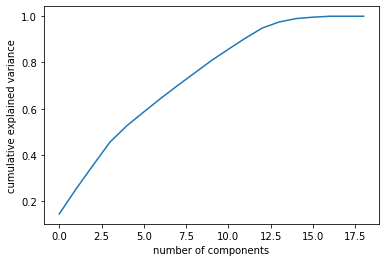

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
pca = PCA(n_components=12)

df_pca = pca.fit_transform(X_scaled)

In [39]:
pca = PCA(n_components=3)

df_pca = pca.fit_transform(X_scaled)

In [ ]:
pca_data=pd.DataFrame(
    data=df_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12"], index= df1.index
)
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.586949,-0.300441,1.310587,-0.996165,0.594269,1.647703,1.749443,0.817373,0.158126,-0.019890,-1.341162,-0.349550
1,-0.462762,-1.840508,0.171053,0.324425,-0.523128,-0.209415,0.127641,0.023649,-0.022018,0.001244,0.327468,0.039226
2,-0.578299,-1.821185,0.157252,0.334472,-0.413420,0.139552,0.346712,0.284247,0.082558,-0.008287,-0.215127,-0.040940
3,1.030667,-0.297709,1.508996,-1.123044,0.049824,0.003147,0.587875,-0.317703,-0.195538,-0.094525,-0.558481,-0.155674
4,-0.286568,-1.881323,0.163558,0.325362,-0.528047,-0.235378,0.121308,-0.001099,-0.042556,0.009422,0.464146,0.055018


In [40]:
pca_data=pd.DataFrame(
    data=df_pca, columns=["PC1", "PC2", "PC3"], index= df1.index
)
pca_data.head()

,PC1,PC2,PC3
0,0.586477,-0.299154,1.308376
1,-0.462896,-1.840148,0.170467
2,-0.578404,-1.820937,0.156882
3,1.030042,-0.295970,1.505996
4,-0.286697,-1.880994,0.163040


In [41]:
inertia = []
k = list(range(1, 13))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_data)
    inertia.append(km.inertia_)
    
elbow_data={"k":k, "inertia":inertia}
df_elbow=pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k",y="inertia",xticks=k,title="Elbow Curve")


:Curve   [k]   (inertia)

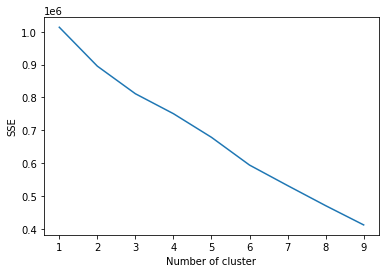

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(pca_data)
    pca_data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [49]:
# Initialize the K-Means model.
model = KMeans(n_clusters=6, random_state=0)

# Fit the model
model.fit(pca_data)

# Predict clusters
predictions = model.predict(pca_data)

In [46]:
# Initialize the K-Means model.
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(pca_data)

# Predict clusters
predictions = model.predict(pca_data)

In [50]:

clustered_df= pd.concat([df1, pca_data], axis=1)

clustered_df["id"] = df_id["id"]

clustered_df["Col"] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(58958, 16)


,gender,age,maritial,countwallet,sumwallet,counttappos,sumtappos,countonlineaut,sumonlineaut,countatm,sumatm,PC1,PC2,PC3,id,Col
0,female,67.0,Single,0,0.0,24,1101.77,2,193.93,5,1733.21,0.586477,-0.299154,1.308376,AA19975,4
1,female,67.0,Married,0,0.0,0,0.00,4,2772.24,0,0.00,-0.462896,-1.840148,0.170467,AA20057,0
2,female,67.0,Married,0,0.0,0,0.00,4,107.41,1,111.30,-0.578404,-1.820937,0.156882,AA20110,0
3,female,67.0,Single,0,0.0,32,2951.51,4,1082.77,0,0.00,1.030042,-0.295970,1.505996,AA20147,4
4,female,67.0,Married,0,0.0,0,0.00,7,3366.89,0,0.00,-0.286697,-1.880994,0.163040,AA20154,0
5,female,67.0,Married,0,0.0,0,0.00,3,934.19,0,0.00,-0.640449,-1.796314,0.185973,AA20275,0
6,female,66.0,Married,0,0.0,0,0.00,1,50.00,0,0.00,-0.790190,-1.741700,0.208423,AA20411,0
7,female,66.0,Married,0,0.0,0,0.00,0,0.00,0,0.00,-0.838184,-1.730816,0.209720,AA20435,0
8,female,66.0,Married,0,0.0,0,0.00,0,0.00,0,0.00,-0.838184,-1.730816,0.209720,AA20469,0
9,female,66.0,Married,0,0.0,17,1804.33,11,13979.49,0,0.00,1.449671,-2.221448,0.126508,AA20480,0


In [48]:
fig = px.scatter_3d(
    clustered_df,
    x="PC1",
    y="PC2",
    z="PC3",
    hover_name = "id",
    #hover_data = ["sumtappos"],
    color="Col",
    symbol="Col",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [51]:
fig = px.scatter_3d(
    clustered_df,
    x="PC1",
    y="PC2",
    z="PC3",
    hover_name = "id",
    #hover_data = ["sumtappos"],
    color="Col",
    symbol="Col",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [63]:
Y_scaled = MinMaxScaler().fit_transform(clustered_df[["age", "counttappos"]])
#Y_scaled[0:5]
Y_scaled


array([[0.54918033, 0.01594684],
       [0.54918033, 0.        ],
       [0.54918033, 0.        ],
       ...,
       [0.29508197, 0.00863787],
       [0.29508197, 0.        ],
       [0.54098361, 0.        ]])

In [64]:
plot_df = pd.DataFrame(data=Y_scaled, columns=["age", "sumwallet"], index=clustered_df.index)

plot_df["id"]=clustered_df["id"]

plot_df["Col"]=clustered_df["Col"]

plot_df.head(10)

,age,sumwallet,id,Col
0,0.549180,0.015947,AA19975,4
1,0.549180,0.000000,AA20057,0
2,0.549180,0.000000,AA20110,0
3,0.549180,0.021262,AA20147,4
4,0.549180,0.000000,AA20154,0
5,0.549180,0.000000,AA20275,0
6,0.540984,0.000000,AA20411,0
7,0.540984,0.000000,AA20435,0
8,0.540984,0.000000,AA20469,0
9,0.540984,0.011296,AA20480,0


In [65]:
plot_df = pd.DataFrame(data=Y_scaled, columns=["age", "counttappos"], index=clustered_df.index)

plot_df["id"]=clustered_df["id"]

plot_df["Col"]=clustered_df["Col"]

plot_df.head(10)

,age,counttappos,id,Col
0,0.549180,0.015947,AA19975,4
1,0.549180,0.000000,AA20057,0
2,0.549180,0.000000,AA20110,0
3,0.549180,0.021262,AA20147,4
4,0.549180,0.000000,AA20154,0
5,0.549180,0.000000,AA20275,0
6,0.540984,0.000000,AA20411,0
7,0.540984,0.000000,AA20435,0
8,0.540984,0.000000,AA20469,0
9,0.540984,0.011296,AA20480,0


In [57]:
plot_df = pd.DataFrame(data=clustered_df, columns=["age", "sumwallet"], index=clustered_df.index)

plot_df["id"]=clustered_df["id"]

plot_df["Col"]=clustered_df["Col"]

plot_df.head(10)

,age,sumwallet,id,Col
0,67.0,0.0,AA19975,4
1,67.0,0.0,AA20057,0
2,67.0,0.0,AA20110,0
3,67.0,0.0,AA20147,4
4,67.0,0.0,AA20154,0
5,67.0,0.0,AA20275,0
6,66.0,0.0,AA20411,0
7,66.0,0.0,AA20435,0
8,66.0,0.0,AA20469,0
9,66.0,0.0,AA20480,0


In [66]:
plot_df = pd.DataFrame(data=clustered_df, columns=["age", "counttappos"], index=clustered_df.index)

plot_df["id"]=clustered_df["id"]

plot_df["Col"]=clustered_df["Col"]

plot_df.head(10)

,age,counttappos,id,Col
0,67.0,24,AA19975,4
1,67.0,0,AA20057,0
2,67.0,0,AA20110,0
3,67.0,32,AA20147,4
4,67.0,0,AA20154,0
5,67.0,0,AA20275,0
6,66.0,0,AA20411,0
7,66.0,0,AA20435,0
8,66.0,0,AA20469,0
9,66.0,17,AA20480,0


In [67]:
plot_df.hvplot.scatter(
    x="age",
    y="counttappos",
    hover_cols=["id"],
    by="Col",
)

:NdOverlay   [Col]
   :Scatter   [age]   (counttappos,id)